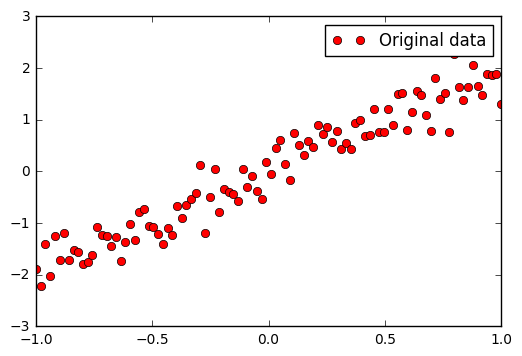

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt




#生成模拟数据
train_X =np.float32( np.linspace(-1, 1, 100))
train_Y = 2 * train_X + np.random.randn(*train_X.shape) * 0.3 # y=2x，但是加入了噪声
#图形显示
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.legend()
plt.show()

In [2]:
# 创建模型

# 模型参数
W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.zeros([1]), name="bias")
# 前向结构
z = tf.multiply(W, train_X)+ b

#反向优化
cost =tf.reduce_mean( tf.square(train_Y - z))
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) #Gradient descent

# 初始化变量
init = tf.global_variables_initializer()
#参数设置
training_epochs = 20
display_step = 2

# 启动session
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer)

        #显示训练中的详细信息
        if epoch % display_step == 0:
            loss = sess.run(cost)
            print ("Epoch:", epoch+1, "cost=", loss,"W=", sess.run(W), "b=", sess.run(b))


    print (" Finished!")
    print ("cost=", sess.run(cost), "W=", sess.run(W), "b=", sess.run(b))

Epoch: 1 cost= 0.42459148 W= [0.9449454] b= [0.01104056]
Epoch: 3 cost= 0.11369922 W= [1.6813048] b= [0.01269893]
Epoch: 5 cost= 0.09341977 W= [1.8693728] b= [0.01272809]
Epoch: 7 cost= 0.09209694 W= [1.9174054] b= [0.01272862]
Epoch: 9 cost= 0.09201065 W= [1.9296737] b= [0.01272862]
Epoch: 11 cost= 0.092005014 W= [1.9328068] b= [0.01272862]
Epoch: 13 cost= 0.09200465 W= [1.933607] b= [0.01272862]
Epoch: 15 cost= 0.09200463 W= [1.9338111] b= [0.01272863]
Epoch: 17 cost= 0.092004634 W= [1.9338622] b= [0.01272863]
Epoch: 19 cost= 0.09200463 W= [1.9338727] b= [0.01272863]
 Finished!
cost= 0.09200463 W= [1.9338727] b= [0.01272863]
